# Glacial Cycles (Pollard 1982)
## Amita and Miriam

### Introduction
Ice sheet dynamics is central to understanding Earth's history and future, especially given rising global temperatures. Melting of ice sheets contributes directly to sea level changes which has negative impacts on many communities and wildlife. However, the long term dynamics of ice sheet melt and formation, caused by changes in Earth's orbit, have facinating effects. Understanding the long term dynamics well allows us to distinguish expected behavior from abnormal melting. <br>

##### Milankovich Cycles
source: https://science.nasa.gov/science-research/earth-science/milankovitch-orbital-cycles-and-their-role-in-earths-climate/ <br>
Milankovich cycles are small perterbations in Earth's orbit that change the total level of sunlight the planet recieves. The main parameters are eccentricity, or the shape of the orbit, obliquity, or the angle of tilt of Earth's axis, and precession, the direction Earth's axis of rotation is pointed. These three variations occur at well known intervals which align with past ice ages, confirmed from ice core data. (Pollard 1982). The main cycles occur in intervals of 20, 40, and 100 kyr. Previous models have captures the 20 and 40 kyr cycles but failed to capture the 100 kyr cycle. The 100 kyr cycle is especially prevelant in Northern Hemisphere ice sheets which is the focus of this paper. 

##### Previous Work


### Equations and Parameters
The fundamental process being studied is the diffusion of ice sheets over time. The thickness, $H$, of an ice sheet over time can be modeled with a nonlinear diffusion equation:
$$ \frac{\partial H}{\partial t} = A \frac{\partial}{\partial x} \left[H^{\alpha}\left| \frac{\partial(H + h)}{\partial x}\right|^{\beta}\frac{\partial(H + h)}{\partial x}\right] + G(H + h, x, \text{orbit})$$ 

$t$: time <br>
$x$: distance from northern boundary to spacial step <br>
$h$: the elevation of the bedrock surface above a fixed reference level (taken as the present mean sea level) <br>

For this model: <br>
$A = 5.77\times10^{-4} \text{m}^{-3}\text{yr}^{-1}$<br>
$\alpha = 5$<br>
$\beta = 2$<br> 

$G$ is the net annual mass balance on the ice sheet surface, depending on snowfall and ice melt, and is given by<br>

$$ G = \begin{cases}
a(h+h' -E) - b(h+h'-E)^2 & h+h' - E \leq 1500 \text{ m} \\
0.56 & h+h' - E > 1500 \text{ m}
\end{cases} \text{     m yr}^{-1} $$
where $E$ is defined 
$$E = E_0(x) + k \Delta Q$$
$k$: insolation sensitivity <br>
$E_0(x)$: the present equlibrium line<br>
$\Delta Q$: is the difference in the summer half-year insolation at $55 \degree$ N from that of the present <br>

##### Assumptions
Several assumptions were made. The bedrock is assumed to be in isostatic equlibrium meaning the effects of bedrock deformation due to the weight of the ice sheet are not taken into account. As a result we can substitute $h = -rH$ where $r = 0.3$ is the ratio of ice density to rock density. When we make this substitution, the PDE becomes
$$ \frac{\partial H}{\partial t} = A(0.7)^{\beta + 1}  \frac{\partial}{\partial x} \left[H^{\alpha}\left| \frac{\partial(H)}{\partial x}\right|^{\beta}\frac{\partial(H)}{\partial x}\right]  $$
The equation is formulated such that east-west diffusion is neglected as well, meaning the ice sheet is only changing height in the north-south direction. Further, the function $G$ to model snow accumulation has many simplifications. The equilibrium line $E$ is taken to have constant slope, and the function doesn't incorporate temperature or the amount of water underneath the ice sheet.

##### Modifications
The paper runs the model for the past 700,000 years however due to the method we chose, stability, and time constraints, our code solves the PDE for the past 50,000 years. This is so that the 20 kyr and 40 kyr Milankovich cycles are captured. Further, the paper integrates from 74 N to 30 N, and for similar reasons as the time modifications, our model is evaluated from 74 N to 65 N which is about 1000 km. Due to this change, in the G function, we instead calculate the summer half year insolation compared to a latitude of 68 N. 

##### Boundary Conditions & Initial Conditons
<img src="boundaryFigure.png" width=658 height=468 /> <br>
To find the boundary conditions, we assume the cross-section of the ice sheet is initially a triangle with length  $1000 \text{ km}$ (the distance between model boundaries of $74 \degree$ N and $65 \degree$ N). After adjusting the initial height, we found 920 m to be a reasonable starting point that allowed for stability. <br> <br>
The boundary condition at the northern boundary is a no flux Neumann. This is because we want to enforce the dome shape of the ice sheet so the top should have a flat (0) slope. The southern boundary is where the ice sheet meets the ocean so it should be at sea level, so we enforce a Dirichlet boundary with $h=0$.

### Numerical Methods
We chose to use a Forward Euler Scheme. We decided to use this numerical method because it is easier to implement and it does not require matrix multiplication, which makes it computationally much faster to implement. However, the Forward Euler Scheme does have it's downsides, as it is more unstable, so we had to make modifications to our model in order to stabalize it. We start with our equation
$$ \frac{\partial H}{\partial t} = A(0.7)^{\beta + 1}  \frac{\partial}{\partial x} \left[H^{\alpha}\left| \frac{\partial(H)}{\partial x}\right|^{\beta}\frac{\partial(H)}{\partial x}\right]  $$
This is a diffusion equation where the diffusivity is spacially dependent and depends on $H$. We have
$$ D = A(0.7)^{\beta + 1}   H^{\alpha}\left| \frac{\partial(H)}{\partial x}\right|^{\beta} $$
$$ \implies \frac{\partial H}{\partial t} = \frac{\partial}{\partial x} \left[ D \frac{\partial H}{\partial x} \right]$$
Using the chain rule:
$$\frac{\partial H}{\partial t} = \frac{\partial D}{\partial x} \frac{\partial H}{\partial x}  + D \frac{\partial ^2 H}{\partial x^2} $$
Now we need to discretize. The LHS is given by
$$ \frac{H_i^{t+1} - H_i^t}{\Delta t}$$
The RHS is given by
$$\frac{D_{i+1} - D_{i-1} }{2 \Delta x} * \frac{H_{i+1} - H_{i-1}}{2 \Delta x} + D_i \frac{H_{i+1} - 2H_i + H_{i+1}}{\Delta x^2} $$
After equating and collecting like terms:
$$H_i^{t+1} = \frac{H_{i-1}}{4\Delta x^2 \Delta t} \left[ -D_{i+1} + D_{i-1} + 4D_i \right] + \frac{H_i}{\Delta t} \left[ \frac{-2 D_i}{\Delta x^2} + \frac{1}{\Delta t}  \right] + \frac{H_{i+1}}{4\Delta x^2 \Delta t} \left[ D_{i+1} - D_{i-1} + 4D_i \right] $$
Let
$$\lambda_i  = \frac{1}{4\Delta x^2 \Delta t} \left[ -D_{i+1} + D_{i-1} + 4D_i \right]$$
$$ \pi_i = \frac{1}{\Delta t} \left[ \frac{-2 D_i}{\Delta x^2} + \frac{1}{\Delta t}  \right]$$
$$ \rho_i = \frac{1}{4\Delta x^2 \Delta t} \left[ D_{i+1} - D_{i-1} + 4D_i \right] $$
Now we can construct a matrix where the lower diagonal is given by $\lambda_i$, the center diagonal is given by $\pi_i$, and the upper diagonal is given by $\rho_i$:
$$M = \begin{bmatrix} 
\pi_1 & \rho_1 & 0 & \dots & & & 0 \\
\lambda_2 & \pi_2 & \rho_2 & 0 & \dots & & 0 \\
0 & \lambda_3 & \pi_3 & \rho_3 & 0 & \dots & 0 \\
\vdots & & \ddots & \ddots & \ddots & & \vdots \\ 
\\
0 & \dots & & & & \lambda_n & \pi_n
\end{bmatrix} $$

As a system the problem becomes 
$$M \begin{bmatrix}
H_1 \\
H_2 \\
\vdots \\
H_n
 \end{bmatrix} = 
 \begin{bmatrix}
H_1^{t+1} \\
H_2^{t+1} \\
\vdots \\
H_n^{t+1}
 \end{bmatrix}
 $$

 Now we need to incorporate the boundary conditions specified earlier. For the northern boudary, we want $\frac{\partial H}{\partial x} = 0$. When we substitute this value into our descritized equation, we get $$ \frac{H_i^{t+1} - H_i^t}{\Delta t} = 0 \implies H_i^{t+1} = H_i^t $$
 Thus, at each each time step we must set the current $H$ vector to have the same first element as the $t+1$ H vector. We also want $H_1 = H_2$, so we modify the first row of $M$ such that $\pi_1 = 1$ and $\rho_1$ = 1. <br>
 
 For the southern boundary, we need to enforce $H = 0$. So the last row of $M$ should be all zeros except final entry which should be 1. Thus the $M$ matrix become
 $$M = \begin{bmatrix} 
1 & -1 & 0 & \dots & & & 0 \\
\lambda_2 & \pi_2 & \rho_2 & 0 & \dots & & 0 \\
0 & \lambda_3 & \pi_3 & \rho_3 & 0 & \dots & 0 \\
\vdots & & \ddots & \ddots & \ddots & & \vdots \\ 
\\
0 & \dots & & & & & 1
\end{bmatrix} $$


### Numerical methods

* Describe the numerical methods used.
* Why did you choose to use these methods
* Code works as intended

## Implementation
### Importing, time stepping, and grid spacing


In [1]:
import numpy as np
import climlab # package used for calculating orbital parameters overtime
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation
import matplotlib.pyplot as plt
from scipy.sparse import diags



#timesteping for calculations
t_i = 0
t_f = -50000 #run model for the past 50,000 years
d_t = 0.1  #use time step of about 36 days, needed for stability
t = np.arange(t_f, t_i+1, d_t)

#timesteping for orbital parameters
d_t_orb = 100 #use time step of 100 years
t_orb = np.arange(t_f, t_i+1, d_t_orb)
t_kyr = (t_orb/(1000)) # years in kyr, needed to calculate orbital parameters


#grid spacing for calculations
x_i = 0 # meters,  corresponds to 74 degrees N latitute (northern boundary) 
x_f = 1000000 # meters,  corresponds to 60 degrees N latitude (southern boundary)
x = np.linspace(x_i, x_f, 38)
d_x = x_f/len(x)

#grid spacing for orbital parameters
x_i_orb = 65 # degrees North latitude (southern boundary)
x_f_orb = 74 # degrees North latitude (northern boundary)
d_x_orb= 0.25 #0.5 degrees as spacial step equivalent to 55km
x_orb = np.arange(x_i_orb, x_f_orb+0.25, d_x_orb)


Tokenization took: 3.31 ms
Type conversion took: 1.95 ms
Parser memory cleanup took: 0.01 ms


### Calculating orbital parameters

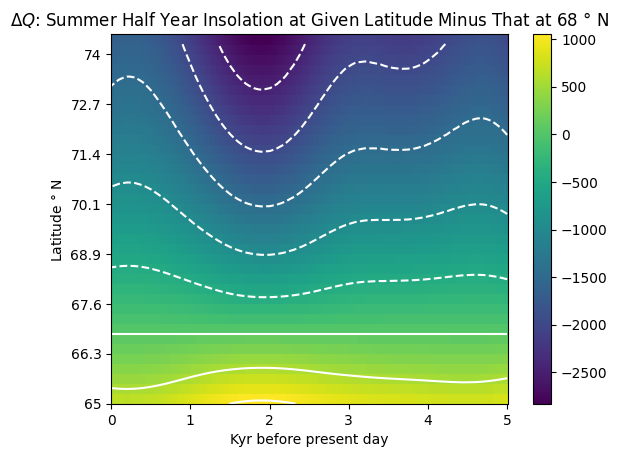

In [3]:
#Calculating Orbital Parameters
days = np.linspace(1,365.24, 365)/365 * 365.24
orb = OrbitalTable.interp(kyear=t_kyr ) #calculate orbital parameters for past 700,000 years, every 100 years

Q = daily_insolation(x_orb, days, orb) #calculate daily insolation per every 500 years based on orbit parameters


#Calculating Summer Half-Year Insolation
delta_Q = np.zeros((len(x_orb), len(t_kyr)))

for i in range(len(t_kyr)):
    daily_68 = Q[7, :, i]
    median_insolation_68 = np.median(daily_68)
    summer_total_68 = sum(daily_68[daily_68>median_insolation_68])
    for j in range(len(x_orb)):
        daily = Q[j,:, i]
        median_insolation = np.median(daily)
        summer_total = sum(daily[daily> median_insolation])
        #now need to subtract the 63 degree N summer half year from each latitute to find delta Q
        delta_Q[j, i] = summer_total - summer_total_68

# Plotting Delta Q
plt.figure()
ax = plt.axes()
plt.pcolor(delta_Q)
plt.colorbar()
plt.contour(delta_Q, colors = 'white')
ax.set_xticks([0, 100, 200, 300, 400, 500], ["0", "1", "2", "3", "4", "5"])
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35],[ "65", "66.3", "67.6",  "68.9", "70.1", "71.4", "72.7", "74" ])
plt.xlabel("Kyr before present day")
plt.ylabel("Latitude $\degree $ N ")
plt.title("$\Delta Q$: Summer Half Year Insolation at Given Latitude Minus That at 68 $\degree$ N" )
plt.show()

### Results

* What simulations did you run with the model?
* Describe the results.
* How do the results compare with any known solutions, or data?
* How do the results change with different methods, time steps, grid spacing, or model parameters?
* What did the model tell you about the process you were studying?
* How could the model be improved in terms of methods used or processes included?